<a href="https://colab.research.google.com/github/Chidiebere-Ogbuchi/ML-Regression--Predicting-Energy-Efficiency-of-Buildings_Hamoye/blob/main/Machine_Learning_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [ ]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [ ]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


df = df.rename(columns=column_names)


In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

<Axes: xlabel='Relative_Compactness', ylabel='Cooling_Load'>

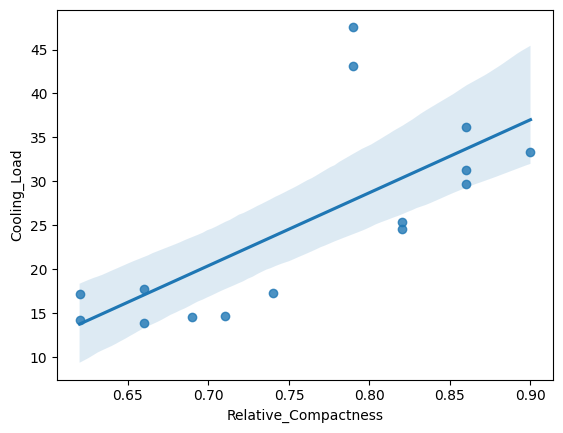

In [ ]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
data=simple_linear_reg_df)

In [ ]:
# Measuring Regression Performance
# ● Mean Absolute Error (MAE)

#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

#Now, we split our dataset into the training and testing dataset. Recall that we
# had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063



0.063

In [ ]:
# ● Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) #prints 1.823


1.821

In [ ]:
# ● Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) #prints 0.089


0.089

In [ ]:
# ● R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) #prints 0.893

0.894

In [ ]:
# Import the necessary libraries
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

# Create and fit Ridge regression model
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

# Create and fit Lasso regression model
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# Define a function to get the weights of each feature
def get_weights_df(model, features, col_name):
    # Retrieve the coefficients (weights) from the model and sort them
    weights = pd.Series(model.coef_, index=features.columns).sort_values()

    # Create a DataFrame to store feature names and their corresponding weights
    weights_df = pd.DataFrame(weights).reset_index()

    # Rename the columns
    weights_df.columns = ['Features', col_name]

    # Round the weights to 3 decimal places
    weights_df[col_name] = weights_df[col_name].round(3)

    return weights_df

# Get weights for the linear regression model
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

# Get weights for the Ridge regression model
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')

# Get weights for the Lasso regression model
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

# Merge the weight DataFrames for comparison
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')


In [ ]:
print(final_weights)

                    Features  Linear_Model_Weight  Ridge_Weight  Lasso_Weight
0               Surface_Area        -5.966585e+12        -0.062         0.000
1       Relative_Compactness        -6.060000e-01        -0.283        -0.028
2                Orientation        -3.000000e-03         0.003         0.000
3  Glazing_Area_Distribution         1.900000e-02         0.029         0.021
4               Glazing_Area         2.290000e-01         0.212         0.206
5             Overall_Height         3.860000e-01         0.442         0.463
6                  Wall_Area         3.480508e+12         0.103         0.200
7                  Roof_Area         4.474939e+12        -0.163        -0.000


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Lasso predict
# Make predictions on the test data
y_pred = lasso_reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.01
R-squared (R2): 0.89


In [ ]:
# Ridge predict
# Make predictions on the test data
y_pred = ridge_reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.01
R-squared (R2): 0.89
